# Vol. 5. Performance analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Strategy</a></span><ul class="toc-item"><li><span><a href="#Using-the-updated-S&amp;P-500-composition-over-time" data-toc-modified-id="Using-the-updated-S&amp;P-500-composition-over-time-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using the updated S&amp;P 500 composition over time</a></span></li><li><span><a href="#Get-groups" data-toc-modified-id="Get-groups-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get groups</a></span></li><li><span><a href="#Pick-the-stocks-with-the-highest-score-in-each-group" data-toc-modified-id="Pick-the-stocks-with-the-highest-score-in-each-group-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pick the stocks with the highest score in each group</a></span></li></ul></li><li><span><a href="#Performance-analysis" data-toc-modified-id="Performance-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Performance analysis</a></span><ul class="toc-item"><li><span><a href="#Use-cumulative-sum-to-compared-with-benchmark-performance" data-toc-modified-id="Use-cumulative-sum-to-compared-with-benchmark-performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Use cumulative sum to compared with benchmark performance</a></span></li><li><span><a href="#Plot-the-lineplot-with-seaborn-library" data-toc-modified-id="Plot-the-lineplot-with-seaborn-library-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot the lineplot with seaborn library</a></span></li><li><span><a href="#Portfolio-sharpe-ratio" data-toc-modified-id="Portfolio-sharpe-ratio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Portfolio sharpe ratio</a></span></li><li><span><a href="#Portfolio-Win-Rate" data-toc-modified-id="Portfolio-Win-Rate-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Portfolio Win Rate</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-words" data-toc-modified-id="Final-words-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Final words</a></span></li></ul></div>

## Strategy
Reference: [【分享】多因子指数增强](https://www.joinquant.com/view/community/detail/8c60c343407d41b09def615c52c8693d?type=1#%E5%9B%9B%E3%80%81%E5%9B%A0%E5%AD%90%E5%A4%9A%E9%87%8D%E5%85%B1%E7%BA%BF%E6%80%A7%E7%9A%84%E5%A4%84%E7%90%86)


1. The central idea of this strategy is to track the performance of the S&P 500 index by buying stocks from every industry sector. 
2. On top of that, we need to avoid the scenario of `survivor bias` which using the same stock set over time. Here is where we get the update S&P 500 index composition from: [【How 2】 Vol. 4. How to produce the S&P 500 Historical Components & Changes](https://mikelhsia.github.io/2021/02/15/2021-02-15-how2-snp500-historic-composition/).
2. Regroup the stocks into three groups by market cap in each industry. 
  - We're going to use `sector` instead of `sicCode` to be our category as the number of sicCode is more than 100 and the number of `sector` is 14.
3. Calculate the total weight of each group accounted for the total weight in the original S&P 500 index
4. Pick the highest score in each group. Then we make its weight equal to the weight we got in step 3. So that we can sample the original S&P 500 index composition with higher quality.

### Using the updated S&P 500 composition over time
Instead of using the same stock throughout our backtest period, we use the S&P 500 scaffolding we built in the post earlier. Think about this, `Tesla` has been added to S&P 500 index on December 21st, but `Tesla`'s stock price has been skyrocketing for months before that. If we're sticking with our strategy stated previously, we wouldn't be able to long `Tesla` as it is not in the S&P 500 index composition until December 21st, 2020. 

Therefore, use the current S&P 500 index composition to run this backtest from 2018, we would purchase `Tesla` early, which, we don't even know whether `Tesla` is a company going to invent this disruptive innovation/technology. It's crucial to make sure you avoid this `survivor bias` when you conduct the factor analysis research.

In [162]:
adjusted_portfolio = snp_scaffolding.copy()
adjusted_portfolio['sector'] = prepared_df['sector']
adjusted_portfolio['score'] = prepared_df['SCORE']
adjusted_portfolio['log_rtn'] = prepared_df['log_rtn']
adjusted_portfolio['rtn'] = prepared_df['rtn']
adjusted_portfolio['log_rtn'] = prepared_df['log_rtn']
adjusted_portfolio['marketCap'] = prepared_df['marketCap']

# Get industry weight
adjusted_portfolio['capWeight'] = adjusted_portfolio.groupby('date')['marketCap'].apply(lambda x:x/x.sum())
adjusted_portfolio['weighted_rtn'] = adjusted_portfolio['capWeight'] * adjusted_portfolio['log_rtn']

adjusted_portfolio.dropna(inplace=True)

In [163]:
adjusted_portfolio

sector     score   log_rtn  \
date                      ticker                                           
2020-04-01 00:00:00+00:00 a               Healthcare  0.123935 -0.038428   
                          aal            Industrials -0.661694 -0.131307   
                          aapl            Technology  1.054552 -0.054052   
                          abbv            Healthcare  0.559987 -0.037034   
                          abc             Healthcare  0.244697 -0.025984   
...                                              ...       ...       ...   
2021-01-20 00:00:00+00:00 yum      Consumer Cyclical -0.661477  0.018635   
                          zbh             Healthcare -0.215117  0.021832   
                          zbra            Technology -0.521714  0.001748   
                          zion    Financial Services  0.266265 -0.021101   
                          zts             Healthcare -0.280524  0.004848   

                                       rtn     marketCap  capWeight  \
date                      ticker                                      
2020-04-01 00:00:00+00:00 a      -0.037699  2.122544e+10   0.001031   
                          aal    -0.123052  4.554568e+09   0.000221   
                          aapl   -0.052617  1.047572e+12   0.050862   
                          abbv   -0.036356  1.043679e+11   0.005067   
                          abc    -0.025650  1.752496e+10   0.000851   
...                                    ...           ...        ...   
2021-01-20 00:00:00+00:00 yum     0.018810  3.239614e+10   0.000969   
                          zbh     0.022072  3.315003e+10   0.000991   
                          zbra    0.001749  2.163793e+10   0.000647   
                          zion   -0.020880  8.090692e+09   0.000242   
                          zts     0.004859  7.726429e+10   0.002310   

                                  weighted_rtn  
date                      ticker                
2020-04-01 00:00:00+00:00 a          -0.000040  
                          aal        -0.000029  
                          aapl       -0.002749  
                          abbv       -0.000188  
                          abc        -0.000022  
...                                        ...  
2021-01-20 00:00:00+00:00 yum         0.000018  
                          zbh         0.000022  
                          zbra        0.000001  
                          zion       -0.000005  
                          zts         0.000011  

[99553 rows x 7 columns]

### Get groups

Let's start grouping the stock by market cap. We use `pd.cut(data, bins=N, labels=[])` function to label each stock by group 1~3

In [164]:
def get_group(ser:pd.Series,N:int=3,ascend:bool=True)->pd.Series:
    # Split the stocks into 3 groups, ascendingly
    ranks = ser.rank(ascending=ascend)
    label = ['G'+str(i) for i in range(1,N + 1)]
    
    return pd.cut(ranks,bins=N,labels=label) 

In [165]:
group_c = [
    pd.Grouper(level='date'),
    pd.Grouper(key='sector')
]

adjusted_portfolio['group'] = adjusted_portfolio.groupby(group_c)['marketCap'].apply(lambda x:get_group(x, 3))

In [166]:
adjusted_portfolio

sector     score   log_rtn  \
date                      ticker                                           
2020-04-01 00:00:00+00:00 a               Healthcare  0.123935 -0.038428   
                          aal            Industrials -0.661694 -0.131307   
                          aapl            Technology  1.054552 -0.054052   
                          abbv            Healthcare  0.559987 -0.037034   
                          abc             Healthcare  0.244697 -0.025984   
...                                              ...       ...       ...   
2021-01-20 00:00:00+00:00 yum      Consumer Cyclical -0.661477  0.018635   
                          zbh             Healthcare -0.215117  0.021832   
                          zbra            Technology -0.521714  0.001748   
                          zion    Financial Services  0.266265 -0.021101   
                          zts             Healthcare -0.280524  0.004848   

                                       rtn     marketCap  capWeight  \
date                      ticker                                      
2020-04-01 00:00:00+00:00 a      -0.037699  2.122544e+10   0.001031   
                          aal    -0.123052  4.554568e+09   0.000221   
                          aapl   -0.052617  1.047572e+12   0.050862   
                          abbv   -0.036356  1.043679e+11   0.005067   
                          abc    -0.025650  1.752496e+10   0.000851   
...                                    ...           ...        ...   
2021-01-20 00:00:00+00:00 yum     0.018810  3.239614e+10   0.000969   
                          zbh     0.022072  3.315003e+10   0.000991   
                          zbra    0.001749  2.163793e+10   0.000647   
                          zion   -0.020880  8.090692e+09   0.000242   
                          zts     0.004859  7.726429e+10   0.002310   

                                  weighted_rtn group  
date                      ticker                      
2020-04-01 00:00:00+00:00 a          -0.000040    G2  
                          aal        -0.000029    G1  
                          aapl       -0.002749    G3  
                          abbv       -0.000188    G3  
                          abc        -0.000022    G1  
...                                        ...   ...  
2021-01-20 00:00:00+00:00 yum         0.000018    G3  
                          zbh         0.000022    G2  
                          zbra        0.000001    G1  
                          zion       -0.000005    G1  
                          zts         0.000011    G3  

[99553 rows x 8 columns]

### Pick the stocks with the highest score in each group

In [167]:
group_c2 = [
    pd.Grouper(level='date'),
    pd.Grouper(key='sector'),
    pd.Grouper(key='group')
]

final_portfolio = adjusted_portfolio.groupby(group_c2)['score'].apply(lambda x: x.idxmax()[1])

In [168]:
final_portfolio

date                       sector                  group
2020-04-01 00:00:00+00:00  Basic Materials         G1        fcx
                                                   G2        iff
                                                   G3         dd
                           Communication Services  G1       lumn
                                                   G2          t
                                                            ... 
2021-01-20 00:00:00+00:00  Technology              G2       twtr
                                                   G3        amd
                           Utilities               G1       evrg
                                                   G2        aes
                                                   G3        aep
Name: score, Length: 6699, dtype: object

In [169]:
# Readjust the format
final_portfolio = final_portfolio.reset_index()
final_portfolio = final_portfolio.set_index(['date', 'score'])
final_portfolio.index.names = ['date', 'ticker']

final_portfolio['rtn'] = adjusted_portfolio['rtn']
final_portfolio['log_rtn'] = adjusted_portfolio['log_rtn']
final_portfolio['weight'] = adjusted_portfolio['capWeight']

# Make the total weight equal to 1
final_portfolio['w'] = final_portfolio.groupby(
    level='date'
)['weight'].transform(
    lambda x: x / x.sum()
)

final_portfolio['weighted_rtn'] = final_portfolio['w'] * final_portfolio['log_rtn']

In [170]:
final_portfolio.to_csv('/Users/michael/Desktop/portfolio.csv')
final_portfolio

sector group       rtn  \
date                      ticker                                           
2020-04-01 00:00:00+00:00 fcx            Basic Materials    G1 -0.065185   
                          iff            Basic Materials    G2 -0.013225   
                          dd             Basic Materials    G3 -0.046334   
                          lumn    Communication Services    G1 -0.070825   
                          t       Communication Services    G2 -0.037736   
...                                                  ...   ...       ...   
2021-01-20 00:00:00+00:00 twtr                Technology    G2  0.036360   
                          amd                 Technology    G3 -0.007826   
                          evrg                 Utilities    G1  0.009554   
                          aes                  Utilities    G2 -0.001426   
                          aep                  Utilities    G3  0.000496   

                                   log_rtn    weight         w  weighted_rtn  
date                      ticker                                              
2020-04-01 00:00:00+00:00 fcx    -0.067407  0.000445  0.007991     -0.000539  
                          iff    -0.013313  0.000512  0.009207     -0.000123  
                          dd     -0.047442  0.001149  0.020651     -0.000980  
                          lumn   -0.073458  0.000433  0.007784     -0.000572  
                          t      -0.038466  0.009104  0.163664     -0.006296  
...                                    ...       ...       ...           ...  
2021-01-20 00:00:00+00:00 twtr    0.035714  0.001092  0.015781      0.000564  
                          amd    -0.007856  0.003217  0.046474     -0.000365  
                          evrg    0.009509  0.000362  0.005231      0.000050  
                          aes    -0.001427  0.000558  0.008062     -0.000012  
                          aep     0.000495  0.001198  0.017307      0.000009  

[6699 rows x 7 columns]

In [171]:
len(final_portfolio.loc[pd.to_datetime('2020-12-18'), :])

33

This is what our final portfolio looks like! Each day, we have one stock picked from the big, medium, small-cap from each sector, which total 33 stocks per day. Now let's start to evaluate the performance against the benchmark.

## Performance analysis

### Use cumulative sum to compared with benchmark performance

In [172]:
x = final_portfolio.groupby('date')['weighted_rtn'].apply(lambda x: x.sum()).cumsum()
benchmark = adjusted_portfolio.reset_index().groupby('date')['weighted_rtn'].apply(lambda x: x.sum()).cumsum()
z = pd.DataFrame([x.values, benchmark.values], index=["portfolio", "benchmark"], columns=x.index).T
z['excess_rtn'] = z['portfolio'] - z['benchmark']
z

,portfolio,benchmark,excess_rtn
date,,,
2020-04-01 00:00:00+00:00,-0.040067,-0.044318,0.004251
2020-04-02 00:00:00+00:00,-0.015274,-0.021553,0.006279
2020-04-03 00:00:00+00:00,-0.032768,-0.036337,0.003569
2020-04-06 00:00:00+00:00,0.026215,0.032608,-0.006393
2020-04-07 00:00:00+00:00,0.023597,0.031145,-0.007548
...,...,...,...
2021-01-13 00:00:00+00:00,0.442975,0.439105,0.003870
2021-01-14 00:00:00+00:00,0.448232,0.435206,0.013026
2021-01-15 00:00:00+00:00,0.430714,0.428291,0.002423


### Plot the lineplot with seaborn library

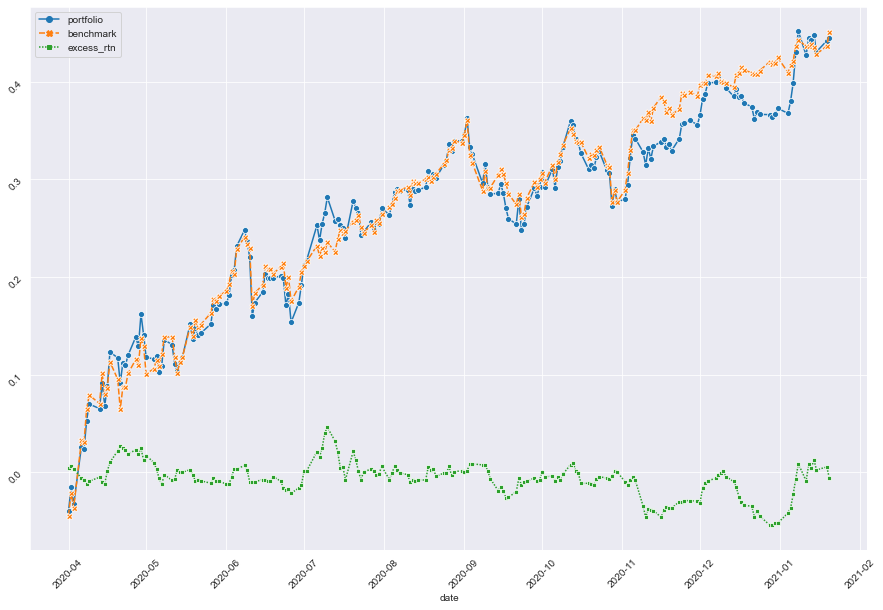

In [173]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.lineplot(data=z, markers=True)

### Portfolio sharpe ratio

### Portfolio Win Rate

In [174]:
# Calculate Sharpe Ratio
ann_factor = 252
sharpe_ratio = np.sqrt(ann_factor) * z['excess_rtn'].mean() / z['portfolio'].std()
  
# Show Results
print('Sharpe Ratio')
print(sharpe_ratio.round(2))

Sharpe Ratio
-1.05


In [175]:
win_rate = len(z[z['excess_rtn'] > 0]['excess_rtn']) / z.shape[0]

# Show Win Rate
print('Win Rate')
print(f'{win_rate*100:.3f} %')

Win Rate
33.990 %


### Conclusion
> |Factors| Strategy return | Benchmark return | Sharpe ratio | Win rate |
> | -- | -- | -- | -- | -- |
> |'SUR0', 'vol60', 'book_to_price', 'vol20'|39.8%|45.08%|-5.82%|13.38%|
>
> In the end, our portfolio is ~0.6% behind the benchmark portfolio, with a negative Sharpe ratio *(-1.05)* and win rate of *33.990%*. To conclude, this factor set ['SUE0', 'vol60', 'book_to_price', 'vol20'] is average effective when scoring the high-quality stocks. But considering building a ststainible index as the S&P 500 index, it's relatively less costly to construct such a portfolio using `33 stocks` comparing to using `500 stocks`.

Once we have this analysis part done, we can conclude that whether our predefined factor set can help us pick high quality stocks. But remember, since we have the framework settled, we can definitely pick another set of factors and easily re-run every cell again to find out the best-fit factors.

You can also build your own strategy like `S&P 500 index premium portfolio` by simply select the top N stocks that have the highest score. I'll leave that to you to find out.

## Final words


This would be the last post in our [Factor Analysis] series. Hope this series could help you get the idea of what factor analysis is about. This methodology doesn't have to be applied to stocks, it could also be applied to the stock market. As said in [【Factor analysis】 Vol. 1. Introduction the idea of factor analysis](https://mikelhsia.github.io/2021/01/31/2021-01-31-factor-analysis/), as long as you can clearly describe the question, collect relative data, and then quantify them, you'll able to use the same framework to help you understand how the data can be interpreted.

See you next time.